# Jupyter Notebook for the 2024 Nobel Prize in Physics

## Introduction to the Ising Model

The Ising model is a mathematical model in statistical mechanics, introduced by Wilhelm Lenz in 1920 and solved for the one-dimensional case by his student Ernst Ising in 1925. The model was originally used to explain ferromagnetism, where magnetic materials exhibit spontaneous magnetization due to interactions between neighboring atomic spins.

* Wilhelm Lenz conceived the model as a simplified representation of magnetic interactions in a lattice, where spins can either point “up” (+1) or “down” (-1).
* Ernst Ising solved the one-dimensional version of the model in his doctoral thesis, showing that it did not exhibit phase transitions—a result that was surprising at the time.
* Lars Onsager solved the two-dimensional version of the model in 1944, demonstrating that it undergoes a phase transition at a critical temperature, where spontaneous magnetization occurs.

Since then, the Ising model has become one of the most widely studied models in statistical physics and beyond. Its applications extend not only to physics (such as in magnetism and lattice gases) but also to fields like biology (neural networks), computer science (optimization problems), and even sociology (modeling opinion dynamics).

The Metropolis algorithm (1953) was developed for Monte Carlo simulations of systems like the Ising model, enabling the study of large, complex systems by simulating their thermal fluctuations and statistical properties. This method revolutionized computational physics and remains a powerful tool in many areas of research today.

## An Implementation of an Ising Model

In this hands-on lab, we will implement the Ising model using the Metropolis algorithm in Python.

### Energy Function of the Ising Model

The total energy of a spin configuration in the Ising model is given by the following Hamiltonian (energy function):
$$
E = - \sum_{\langle i,j \rangle} J_{ij} s_i s_j - \mu \sum_i h_i s_i,
$$
where:
* $s_i$ is the spin at site $i$, which takes the value +1 or -1.
* $J_{ij}$ is the coupling constant between neighboring spins $i$ and $j$. This parameter determines how strongly the spins influence each other. Positive $J_{ij}$ indicates ferromagnetic coupling (spins prefer to align), while negative $J_{ij}$ indicates antiferromagnetic coupling (spins prefer to be anti-aligned).
* $\langle i,j \rangle$  represents the sum over all nearest neighbors.
* $h_i$ is the external magnetic field applied to spin $s_i$.
* $\mu$ is a constant related to the magnetic moment of the spins.

The system tries to minimize its total energy $E$.
In the absence of an external field $(h_i = 0)$, the model behaves purely based on the interaction between neighboring spins.
In regions where $J_{ij} > 0$, spins tend to align, either all pointing up (+1) or all pointing down (-1).

### Energy Change Due to Spin Flip

When a single spin $s_i$ flips, the change in energy is calculated by comparing the energy before and after the flip. The energy difference $\Delta E$ due to flipping the spin at site $i$ is:
$$
\Delta E = 2 s_i \sum_{\langle i,j \rangle} J_{ij} s_j,
$$
where the sum is over the nearest neighbors $j$ of site $i$.
The factor of 2 arises because flipping the spin at site $i$ changes its contribution to the energy from $-s_i s_j$ to $+s_i s_j$.

### Metropolis Algorithm

To simulate the evolution of the system at a given temperature, we use the Metropolis algorithm.
This algorithm probabilistically accepts or rejects a spin flip based on the energy change  $\Delta E$ and the temperature $T$.
The probability of accepting a spin flip is given by the Boltzmann factor:
$$
P(\text{flip}) =
\begin{cases}
1 & \text{if } \Delta E < 0, \\
\exp\left(-\frac{\Delta E}{k_B T}\right) & \text{if } \Delta E \geq 0,
\end{cases}
$$
where:
* $\Delta E$ is the energy change caused by the flip.
* $k_\mathrm{B}$ is the Boltzmann constant.
* $T$ is the temperature.
This allows the system to "explore" higher energy states at higher temperatures (thermal fluctuations), while favoring low-energy configurations as the system cools down.

Given that the Ising model is pretty simple, we only need to use two packages, `numpy` for array handing and `matplotlib` for plotting.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

For easy comparison of simulation paramaters, we will implement the Ising model as a class.

In [2]:
class IsingModel:

    def __init__(self, T, shape=(64,64)):
        self.T     = T
        self.shape = shape
        self.state = None

    def random(self, seed=None):
        if seed is not None:
            random.seed(seed)
        self.state = np.random.choice([-1,1], size=self.shape)

    @staticmethod
    def dE(state, i,j):
        I,J = state.shape
        return ... # TODO: implement the change of energy

    @staticmethod
    def flip(state, i,j, T):
        dE = IsingModel.dE(state, i,j)
        return ... # TODO: implement the probability of accepting a spin flip

    @staticmethod
    def step(state, i,j, T):
        if IsingModel.flip(state, i,j, T):
            state[i,j] *= -1

    def run(self, N):
        for n in range(N):
            i = np.random.randint(0, self.shape[0])
            j = np.random.randint(0, self.shape[1])
            self.step(self.state, i, j, self.T)

In [3]:
I = IsingModel(1)

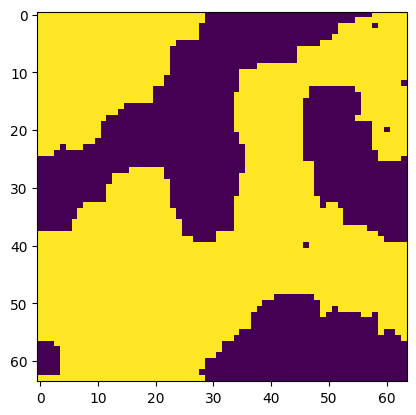

In [4]:
I.random()
I.run(64*64*100)
plt.imshow(I.state)

In [ ]:
# TODO: instead of just visualizing the final output, implement a loop to create a movie

...

In [ ]:
# TODO: plot magnetization, i.e., sum(state) / state.size, as a function of step

...

In [ ]:
# TODO: plot magnetization for different temperature

...

## Hopfield Network

The Hopfield network, developed by John Hopfield in 1982, is an artificial neural network model with a deep connection to the Ising model.
This connection is key to understanding why Hopfield's work, recognized in the 2024 Nobel Prize in Physics, has had such a profound impact on the fields of neural networks and machine learning.

At its core, the Hopfield network functions as a recurrent neural network designed to store and recall patterns.
Each "neuron" in the network can be in one of two states: active (+1) or inactive (-1).
This binary nature closely mirrors the spin states in the Ising model, where each spin is either "up" or "down".
The neurons are interconnected, and the network evolves by updating the state of each neuron based on the states of its neighbors, following rules that minimize the system's overall energy.

What makes this particularly interesting is that the energy minimization process in the Hopfield network is mathematically analogous to how the Ising model works.
In both systems, there is a well-defined energy function that describes the interaction between units---spins in the Ising model, and neurons in the Hopfield network.
The system naturally evolves toward a state that minimizes this energy, and for the Hopfield network, these low-energy states correspond to stored memory patterns.
When a noisy or incomplete input is presented to the network, it "relaxes" into one of these low-energy states, effectively recalling the stored pattern.

This shared framework of energy minimization is what connects the Hopfield network so closely to the Ising model.
In fact, the mathematical structure of the energy function in a Hopfield network is very similar to the Hamiltonian of the Ising model, where the weights between neurons play a role analogous to the coupling between spins.

The recognition of the Hopfield network in the 2024 Nobel Prize highlights this elegant crossover between physics and neural computation.
The ideas from statistical mechanics, particularly the energy minimization concepts of the Ising model, laid the groundwork for significant advances in understanding how networks of simple elements---whether spins or neurons---can produce complex, emergent behavior.

### Energy Function of the Hopfield Network

The energy of a Hopfield network is given by a Hamiltonian similar to that of the Ising model:
$$
E = - \sum_{i \neq j} W_{ij} \sigma_i \sigma_j - \sum_i \theta_i \sigma_i,
$$
where:
* $\sigma_i$ is the state of neuron $i$, taking values +1 or -1.
* $W_{ij}$ represents the connection strength (synaptic weight) between neurons $i$ and $j$.
* $\theta_i$ is the threshold value for neuron $i$.

The network evolves to minimize this energy function, analogous to how the Ising model minimizes its energy through spin alignment.

### Energy Change in the Hopfield Network

When a single neuron $\sigma_i$ flips, the change in energy is:
$$
\Delta E = 2 \sigma_i \sum_j W_{ij} \sigma_j.
$$
Similar to the Ising model, this energy change depends on the state of neighboring neurons and their connection strengths.

### Hebbian Learning Rule

The weights in a Hopfield network are learned using the Hebbian learning rule, which strengthens the connections between neurons that are activated together.
The weights are calculated as:
$$
W_{ij} = \frac{1}{P} \sum_p \sigma_i^p \sigma_j^p
$$
Where:
* $N$ is the number of neurons.
* $P$ is the number of patterns.
* $\sigma_i^p$ is the state of neuron $i$ in a pattern $p$.

This ensures that when the network is presented with an input similar to one of the stored patterns, it evolves toward that pattern by minimizing its energy.

In order to provide some interesting example images, we important an additional packages `pillow`.

In [5]:
from PIL import Image

Similar to the Ising model, we then implement the Hopfield Network in a class.

In [6]:
class HopfieldNetwork:
    
    def __init__(self, shape=(64,64)):
        self.W     = 0.0
        self.shape = shape
        self.state = None

    def random(self, seed=None):
        if seed is not None:
            random.seed(seed)
        self.state = np.random.choice([-1,1], size=self.shape)

    def train(self, patterns):
        for p in patterns:
            assert p.shape == self.shape
            ... # TODO: implement the Hebbian learning rule
        np.fill_diagonal(self.W, 0)  # ensure no neuron connects to itself
        self.W /= len(patterns)      # normalize by the number of patterns

    @staticmethod
    def step(state, i, j, W):
        state[i,j] = np.sign(np.dot(W[i*state.shape[1]+j], state.flatten()))

    def run(self, N):
        for n in range(N):
            i = np.random.randint(0, self.shape[0])
            j = np.random.randint(0, self.shape[1])
            self.step(self.state, i, j, self.W)

To provide an interesting demo, we use `pillow` to load two png files.
They are U of A and wildcat logos.

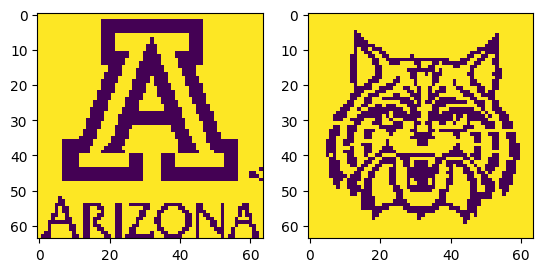

In [7]:
with Image.open("A.png") as f:
    A = ... # TODO: turn image into bitmap

with Image.open("C.png") as f:
    C = ... # TODO: turn image into bitmap

fig, (ax0, ax1) = plt.subplots(1,2)
ax0.imshow(A)
ax1.imshow(C)

We then create a Hopfield Network and "train" it with the two logos.

In [8]:
h = HopfieldNetwork()
h.train([A, C])

Then, by randomly initializing the state of the network, we can recover one of the logos.

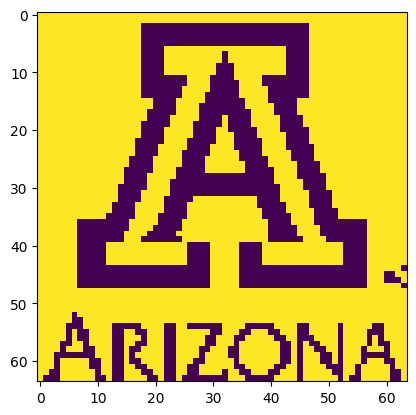

In [9]:
h.random()
h.run(256*256)
plt.imshow(h.state)

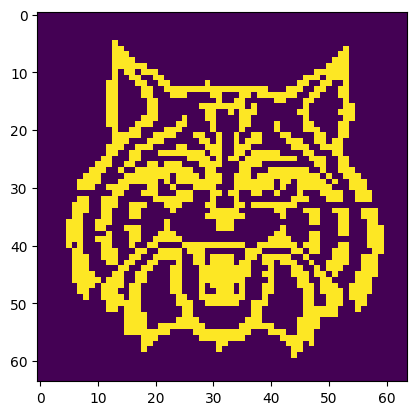

In [10]:
h.random()
h.run(256*256)
plt.imshow(h.state)

In [ ]:
# TODO: load up more images/patterns to train the Hopfield Network

...

In [ ]:
# TODO: implement some control to the radom state so they are more likely
# to converge to a particular image

...

In [ ]:
# TODO: instead of just visualizing the final output, implement a loop to create a movie

...

## Boltzmann Machine

The Boltzmann Machine, introduced by Geoffrey Hinton and Terrence Sejnowski in 1985, is a stochastic recurrent neural network.
It is named after the Boltzmann distribution, which describes the probability distribution of states in a system at thermal equilibrium.
The key idea is that the network evolves to minimize its energy, with neurons (or nodes) probabilistically switching between states based on their energy contributions.

Like the Hopfield network, the Boltzmann Machine consists of binary units that can take on states of active (+1) or inactive (-1).
However, unlike Hopfield networks, the Boltzmann Machine uses stochastic (probabilistic) updates instead of deterministic updates.
This allows it to explore a broader set of possible states and makes it more suitable for tasks such as learning probability distributions.
In this sense, the update algorithm of a Boltzmann Machine is more similar to the Ising model than the Hopfield Network.

### Energy Function of the Boltzmann Machine

The energy of the Boltzmann Machine, like that of the Hopfield network and the Ising model, is defined by an energy function:
$$
E = - \sum_{i \neq j} W_{ij} \sigma_i \sigma_j - \sum_i \theta_i \sigma_i
$$
where:
* $\sigma_i$ represents the state of neuron $i$, which takes values +1 or -1.
* $W_{ij}$ is the symmetric weight between neuron $i$ and neuron $j$.
* $\theta_i$ is the bias term for neuron $i$.

Note that its form is identical to a Hopfield Network.
The main difference is that the Boltzmann Machine aims to minimize this energy follows a Boltzmann distribution:
$$
P(\sigma) = \frac{1}{Z} \exp\left( -\frac{E(\sigma)}{k_B T} \right)
$$
Where:
* $P(\sigma)$  is the probability of the system being in state $\sigma$.
* $Z$ is the partition function, ensuring that all probabilities sum to 1.
* $k_\mathrm{B}$ is the Boltzmann constant.
* $T$ is the temperature of the system.

This probabilistic nature allows the Boltzmann Machine to explore different states, potentially escaping local energy minima and converging toward global minima, making it more powerful for optimization tasks than the Hopfield network.

### Probabilistic Updates (Gibbs Sampling)

In a Boltzmann Machine, neurons are updated asynchronously and probabilistically using Gibbs sampling.
The update rule is based on the sigmoid function of the weighted sum of the states of connected neurons:
$$
P(\sigma_i = 1) = \frac{1}{1 + \exp\left( -\frac{ \sum_j W_{ij} \sigma_j + \theta_i}{T} \right)}
$$
where:
* $\sum_j W_{ij} \sigma_j$ is the total input from the neighboring neurons to neuron $i$.
* $\theta_i$ is the bias for neuron $i$.
* $T$ is the temperature, controlling the degree of randomness.

At high temperatures $T$, neurons flip more randomly, allowing the system to explore a wider range of configurations.
As the temperature decreases, the system is more likely to settle into lower-energy states, much like in simulated annealing, which is an optimization algorithm inspired by the Boltzmann Machine.

### Learning in Boltzmann Machines

Learning in a Boltzmann Machine typically involves adjusting the weights $W_{ij}$ so that the network can model a given dataset or probability distribution.
This is usually done using a variant of the contrastive divergence algorithm, which adjusts the weights to minimize the difference between the data distribution and the distribution generated by the network.

The learning rule for the weights is derived from the difference between the correlations of the visible and hidden units in the "positive" phase (before sampling) and the "negative" phase (after sampling):
$$
\Delta W_{ij} = \eta \left( \langle \sigma_i \sigma_j \rangle_{\text{data}} - \langle \sigma_i \sigma_j \rangle_{\text{model}} \right)
$$
where:
* $\eta$ is the learning rate.
* $\langle \sigma_i \sigma_j \rangle_{\text{data}}$ represents the average correlation between units $i$ and $j$ when the network is clamped to the training data.
* $\langle \sigma_i \sigma_j \rangle_{\text{model}}$ represents the average correlation when the network is free to sample from its distribution.

This rule updates the weights such that the Boltzmann Machine learns to model the input data.

In [ ]:
# TODO: Implement a Boltzmann Machine

...